In [1]:
# Clustering of timeseries data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sompy

backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
agg = pd.read_csv('sku_labels.csv')
df = pd.read_csv('extracted_features.csv')
df.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [3]:
agg.head()

,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory
0,28,TY,06,063,20G
1,34,TY,4,11,35A
2,100,BH,02,38,C09
3,152,BH,02,139,00L
4,182,TY,8,33,16K


In [4]:
df.dropna(axis=1, inplace=True)

In [5]:
df.shape

(3193, 442)

In [6]:
scale = MinMaxScaler()
skus = df['id']
df.set_index('id', inplace=True)
X = scale.fit_transform(df)

In [7]:
X.shape

(3193, 441)

In [8]:
names = df.columns

## SOMPY implementation

In [9]:
from sompy.sompy import SOMFactory

In [10]:
sm = SOMFactory().build(X, normalization = 'var', mapsize=(15,15), initialization='pca')
sm.train(n_job=1, verbose='info', train_rough_len=20, train_finetune_len=20)

 Training...
 pca_linear_initialization took: 0.127000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 20

 epoch: 1 ---> elapsed time:  0.121000, quantization error: 13.150109

 epoch: 2 ---> elapsed time:  0.118000, quantization error: 12.635340

 epoch: 3 ---> elapsed time:  0.119000, quantization error: 11.612313

 epoch: 4 ---> elapsed time:  0.117000, quantization error: 11.314238

 epoch: 5 ---> elapsed time:  0.117000, quantization error: 11.237481

 epoch: 6 ---> elapsed time:  0.116000, quantization error: 11.202308

 epoch: 7 ---> elapsed time:  0.114000, quantization error: 11.177484

 epoch: 8 ---> elapsed time:  0.119000, quantization error: 11.154246

 epoch: 9 ---> elapsed time:  0.115000, quantization error: 11.130390

 epoch: 10 ---> elapsed time:  0.115000, quantization error: 11.104217

 epoch: 11 ---> elapsed time:  0.115000, quantization error: 11.077127

 epoch: 12 ---> elapsed time:  0.117000, quantization error: 11.050380

 

In [11]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.2505480739116818; Quantization error = 10.73419036545978


In [12]:
from sompy.visualization.mapview import View2D

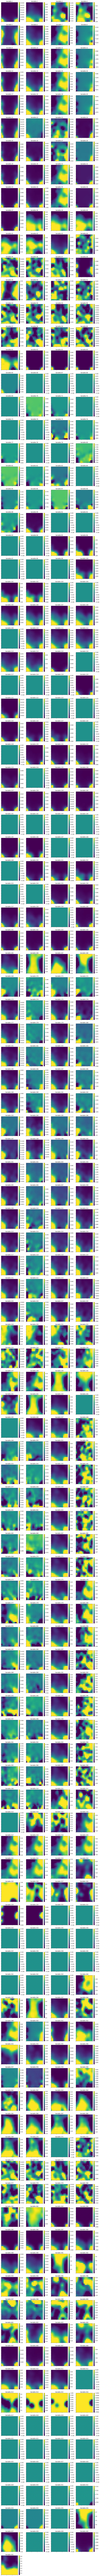

In [13]:
from sompy.visualization.mapview import View2D
view2D  = View2D(15,15,"time-series",text_size=10, names=names)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [14]:
from sompy.visualization.bmuhits import BmuHitsView

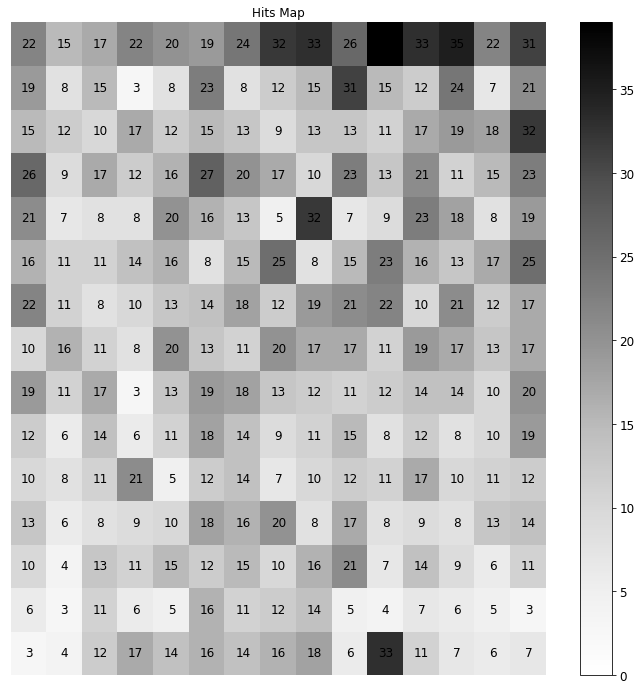

In [15]:
vhts  = BmuHitsView(12,12,"Hits Map",text_size=12)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

In [16]:
sm._calculate_ms_and_mpd()

(15, 0.0704666457876605)

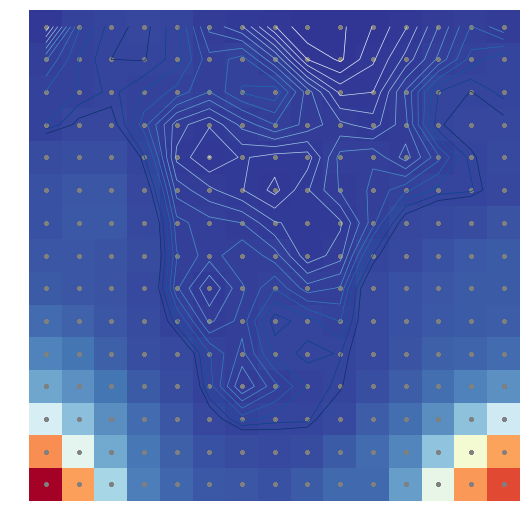

In [17]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
UMAT  = u.build_u_matrix(sm, distance=1, row_normalized=False)
UMAT = u.show(sm, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


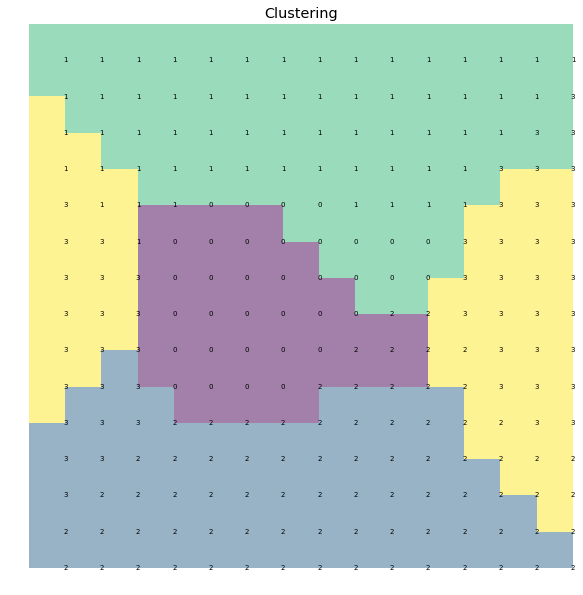

In [18]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=12)
a=hits.show(sm)

In [19]:
from sklearn.cluster import KMeans

In [20]:
scores = {}
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i)
    clusters_fit = kmeans.fit_predict(sm._normalizer.denormalize_by(sm.data_raw, sm.codebook.matrix))
    scores[i] = kmeans.inertia_

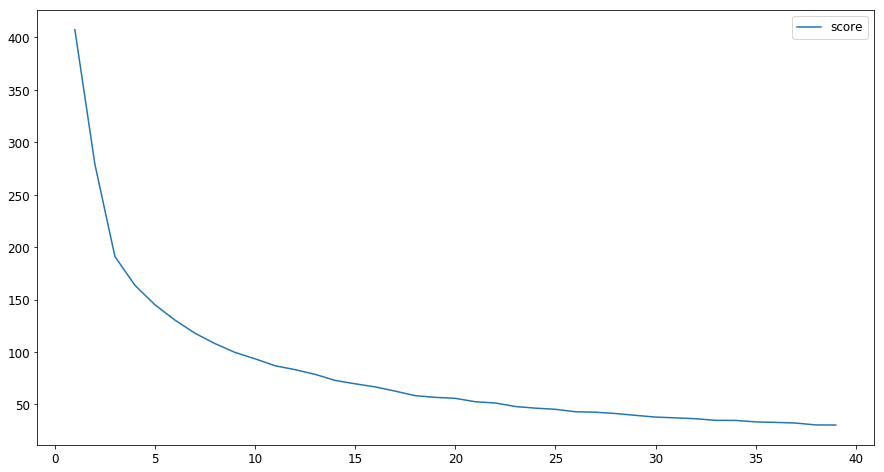

In [21]:
pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))

In [22]:
clusters = sm.cluster(n_clusters=5)

In [23]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       0, 0, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4,
       4, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 4], dtype=int32)

In [24]:
map_dict = {}
for i, j in enumerate(clusters):
    map_dict[i] = j

In [25]:
assignment = pd.DataFrame(sm._bmu).T

In [26]:
assignment[0] = assignment[0].astype(int)
assignment.head()

,0,1
0,14,9.574377
1,66,6.322556
2,182,11.106346
3,22,6.768503
4,187,10.033114


In [27]:
cluster_assignments = assignment[0].map(map_dict)

In [28]:
df_assigned = df.reset_index().join(pd.DataFrame(cluster_assignments))

In [29]:
df_assigned.head()

,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,0
0,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,0.035937,0.011302,...,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0,1
1,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,-0.006001,0.005213,...,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0,1
2,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,-0.028886,0.017587,...,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0,4
3,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,-0.003946,0.005144,...,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0,1
4,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,0.028471,0.021181,...,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0,4


### To do:

* Clean up code and remove all redundant code
* Run EDA on clusters, see if you can extract meaning and the features that seperate them/


## t-SNE

In [30]:
dimred = TSNE()
plot_df = dimred.fit_transform(X)
plot_df = pd.DataFrame(plot_df).join(df.reset_index())
plot_df.head()

,0,1,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__time_reversal_asymmetry_statistic__lag_1,sales__time_reversal_asymmetry_statistic__lag_2,sales__time_reversal_asymmetry_statistic__lag_3,sales__value_count__value_-inf,sales__value_count__value_0,sales__value_count__value_1,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation
0,4.376812,-27.583281,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.031519,-0.083333,0.000000,0.0,643.0,25.0,0.0,0.0,0.621100,0.0
1,12.228464,-14.357075,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,-0.008633,0.014430,-0.014472,0.0,600.0,78.0,0.0,0.0,0.236220,0.0
2,-53.176727,17.166359,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,-2.063037,-0.877874,-0.746398,0.0,171.0,157.0,0.0,0.0,5.145510,1.0
3,52.828701,-8.922633,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.002933,-0.002941,0.000000,0.0,655.0,16.0,0.0,0.0,0.109897,0.0
4,-35.418358,-3.279015,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.735336,2.065997,1.467626,0.0,327.0,135.0,0.0,0.0,4.060313,1.0


In [31]:
dimred.kl_divergence_

1.5710924863815308

In [32]:
plot_df['sku_key'] = plot_df['id'].astype(int)
agg['sku_key'] = agg['sku_key'].astype(int)

plot_df = plot_df.merge(agg, how='left', on='sku_key')

In [33]:
listof = {}
for i, j in enumerate(plot_df['sku_department'].unique()):
    listof[j] = i

In [34]:
plot_df['sku_department'] = plot_df['sku_department'].map(listof)

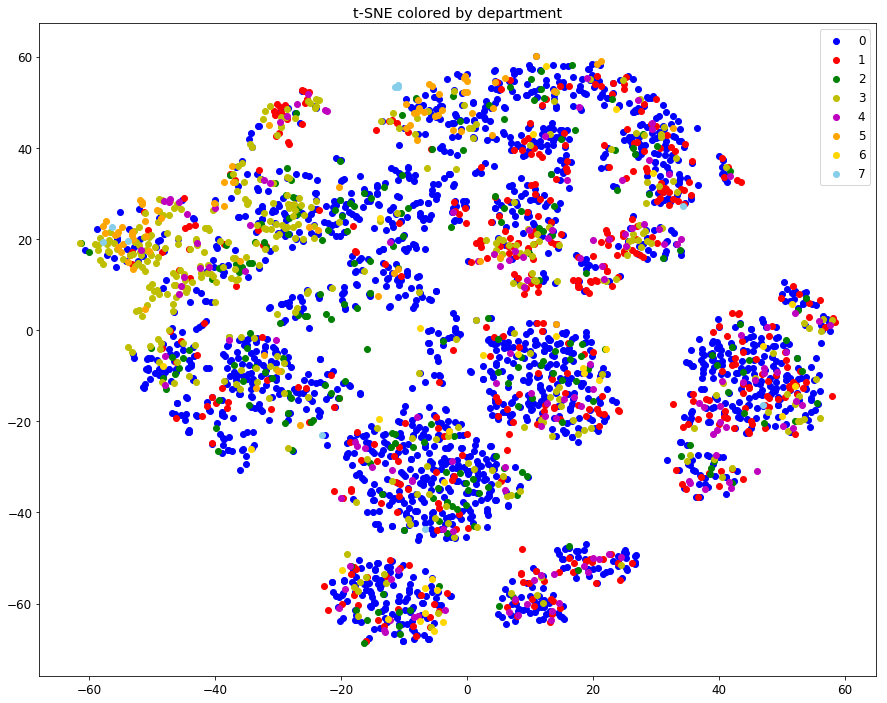

In [35]:
f, ax = plt.subplots(figsize=(15,12))

colors=['b', 'r', 'g', 'y', 'm', 'orange', 'gold', 'skyblue']

for i in plot_df['sku_department'].unique():
    ax.scatter(plot_df[plot_df['sku_department'] == i][0], plot_df[plot_df['sku_department'] == i][1],
    color=colors[i], label=i)           
    
ax.legend()
ax.set_title('t-SNE colored by department')
plt.show()

t-SNE K-means

In [36]:
scores = {}
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i)
    clusters_fit = kmeans.fit_predict(plot_df[[0,1]])
    scores[i] = kmeans.inertia_

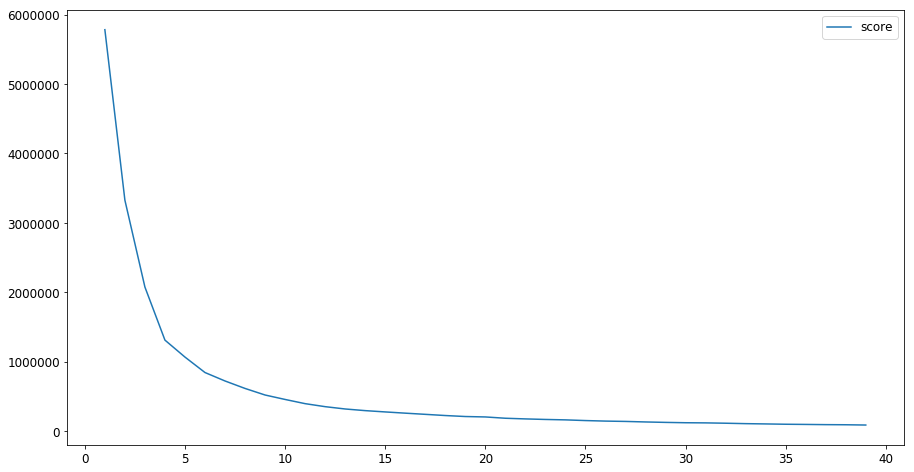

In [37]:
pd.DataFrame(scores, index=['score']).T.plot(figsize=(15,8))

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
kmeans = AgglomerativeClustering(n_clusters=8)

In [40]:
clusters_fit = kmeans.fit_predict(plot_df[[0,1]])

In [41]:
tsne_cluster = plot_df.join(pd.DataFrame(clusters_fit), rsuffix='clus')
tsne_cluster.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)
tsne_cluster.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,4.376812,-27.583281,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,0,06,063,20G,6
1,12.228464,-14.357075,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,0,4,11,35A,5
2,-53.176727,17.166359,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,1,02,38,C09,0
3,52.828701,-8.922633,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,1,02,139,00L,3
4,-35.418358,-3.279015,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,0,8,33,16K,4


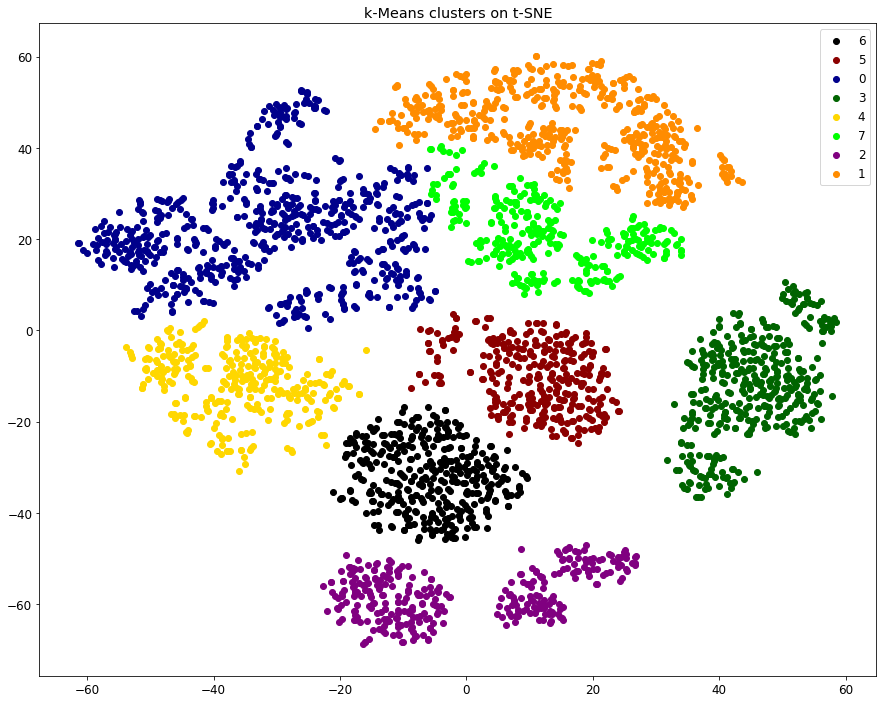

In [42]:
f, ax = plt.subplots(figsize=(15,12))

colors=['darkblue', 'darkorange', 'purple', 'darkgreen', 'gold', 'darkred', 'black', 'lime']

for i in tsne_cluster['cluster'].unique():
    ax.scatter(tsne_cluster[tsne_cluster['cluster'] == i]['tsne1'], tsne_cluster[tsne_cluster['cluster'] == i]['tsne2'],
    color=colors[i], label=i)           
    
ax.legend()
ax.set_title('k-Means clusters on t-SNE')
plt.show()

SOM t-SNE

In [43]:
new_df = plot_df.join(pd.DataFrame(cluster_assignments), rsuffix='clus')
new_df.rename(columns={'0':'tsne1', 1:'tsne2', '0clus':'cluster'}, inplace=True)
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,4.376812,-27.583281,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,0,06,063,20G,1
1,12.228464,-14.357075,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,0,4,11,35A,1
2,-53.176727,17.166359,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,1,02,38,C09,4
3,52.828701,-8.922633,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,1,02,139,00L,1
4,-35.418358,-3.279015,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,0,8,33,16K,4


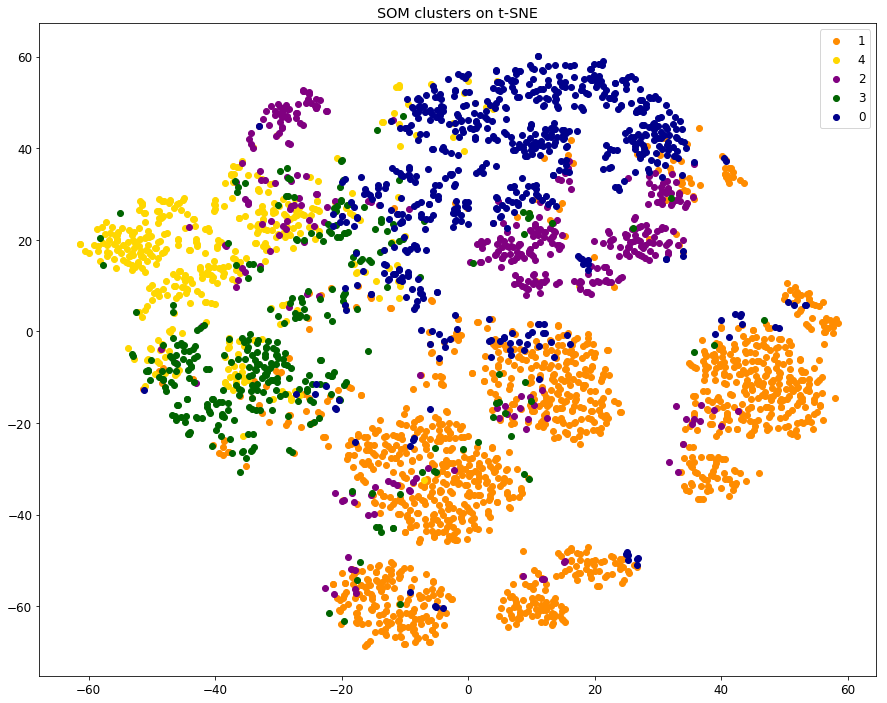

In [44]:
f, ax = plt.subplots(figsize=(15,12))

colors=['darkblue', 'darkorange', 'purple', 'darkgreen', 'gold', 'darkred']

for i in new_df['cluster'].unique():
    ax.scatter(new_df[new_df['cluster'] == i]['tsne1'], new_df[new_df['cluster'] == i]['tsne2'],
    color=colors[i], label=i)           
    
ax.legend()
ax.set_title('SOM clusters on t-SNE')
plt.show()

## Extract insights from clusters

In [45]:
new_df.head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sales__value_count__value_inf,sales__value_count__value_nan,sales__variance,sales__variance_larger_than_standard_deviation,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster
0,4.376812,-27.583281,28,455.0,228.0,0.009909,-0.001607,0.001339,0.188732,0.359772,...,0.0,0.0,0.621100,0.0,28,0,06,063,20G,1
1,12.228464,-14.357075,34,186.0,226.0,-0.004615,-0.017574,0.001181,1.335614,-0.138257,...,0.0,0.0,0.236220,0.0,34,0,4,11,35A,1
2,-53.176727,17.166359,100,6946.0,1549.0,0.009112,0.010989,0.001624,7.239437,-0.195348,...,0.0,0.0,5.145510,1.0,100,1,02,38,C09,4
3,52.828701,-8.922633,152,78.0,85.0,-0.002430,-0.012023,0.001742,0.699379,-0.093300,...,0.0,0.0,0.109897,0.0,152,1,02,139,00L,1
4,-35.418358,-3.279015,182,4038.0,1163.0,-0.005931,-0.003367,0.001556,3.848592,0.159739,...,0.0,0.0,4.060313,1.0,182,0,8,33,16K,4


In [46]:
product_sales = pd.read_csv('aggregate_products.csv')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
product_sales['sku_key'] = product_sales['sku_key'].astype(int)
product_sales.drop(['sku_department', 'sku_subdepartment', 'sku_category', 'sku_subcategory'], axis=1, inplace=True)
product_sales.head()

,sku_key,tran_date,sales,selling_price,avg_discount
0,28,2016-03-02,1,89.9,0.0
1,28,2016-03-03,0,89.9,0.0
2,28,2016-03-04,0,89.9,0.0
3,28,2016-03-05,0,89.9,0.0
4,28,2016-03-06,0,89.9,0.0


In [48]:
cluster_dfs = {}
for i in new_df['cluster'].unique():
    cluster_dfs['cluster_{}'.format(i)] = new_df[new_df['cluster'] == i]

In [49]:
for i in cluster_dfs.keys():
    cluster_dfs[i] = cluster_dfs[i].merge(product_sales, on='sku_key')

In [50]:
cluster_dfs['cluster_0'].head()

,tsne1,tsne2,id,sales__abs_energy,sales__absolute_sum_of_changes,"sales__agg_autocorrelation__f_agg_""mean""","sales__agg_autocorrelation__f_agg_""median""","sales__agg_autocorrelation__f_agg_""var""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","sales__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""",...,sku_key,sku_department,sku_subdepartment,sku_category,sku_subcategory,cluster,tran_date,sales,selling_price,avg_discount
0,-0.573229,28.250984,7155,36.0,48.0,-0.015628,-0.029466,0.013702,0.909091,0.20702,...,7155,0,TY,057,057,0,2017-10-20,1,799.9,0.0
1,-0.573229,28.250984,7155,36.0,48.0,-0.015628,-0.029466,0.013702,0.909091,0.20702,...,7155,0,TY,057,057,0,2017-10-21,0,799.9,0.0
2,-0.573229,28.250984,7155,36.0,48.0,-0.015628,-0.029466,0.013702,0.909091,0.20702,...,7155,0,TY,057,057,0,2017-10-22,0,799.9,0.0
3,-0.573229,28.250984,7155,36.0,48.0,-0.015628,-0.029466,0.013702,0.909091,0.20702,...,7155,0,TY,057,057,0,2017-10-23,0,799.9,0.0
4,-0.573229,28.250984,7155,36.0,48.0,-0.015628,-0.029466,0.013702,0.909091,0.20702,...,7155,0,TY,057,057,0,2017-10-24,0,799.9,0.0




 sales
cluster_1


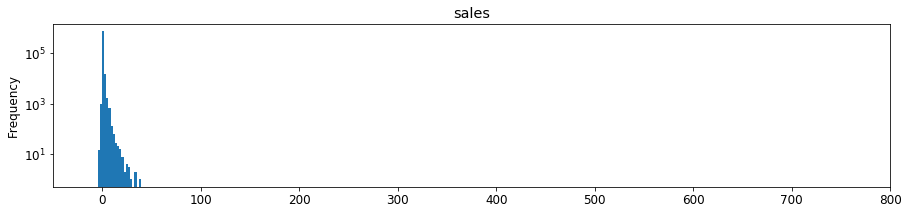

cluster_4


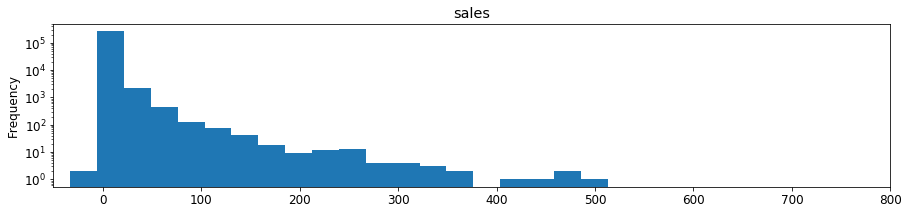

cluster_2


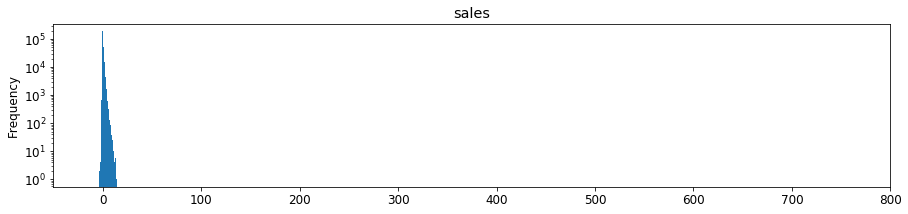

cluster_3


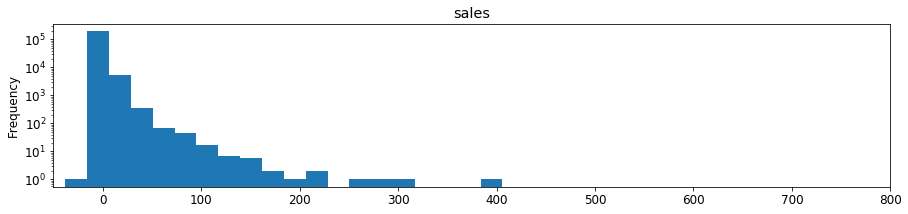

cluster_0


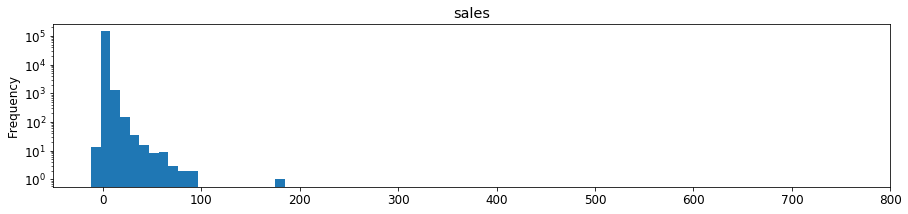



 selling_price
cluster_1


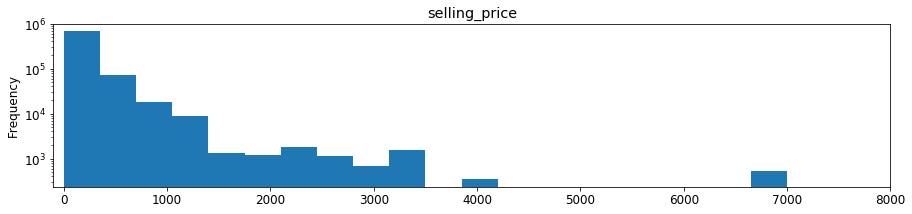

cluster_4


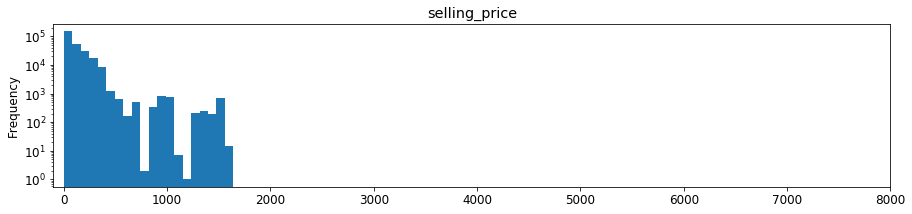

cluster_2


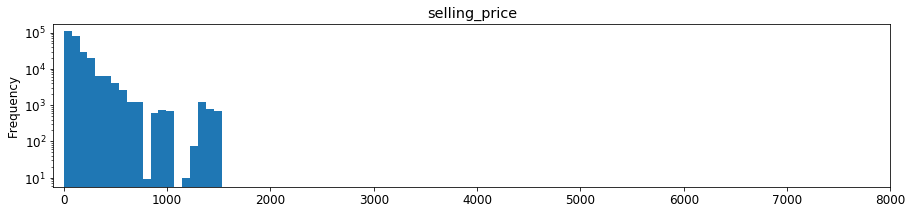

cluster_3


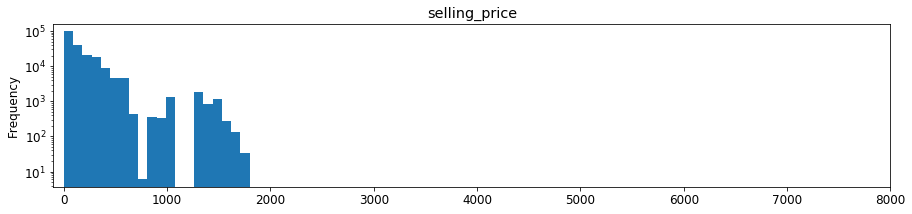

cluster_0


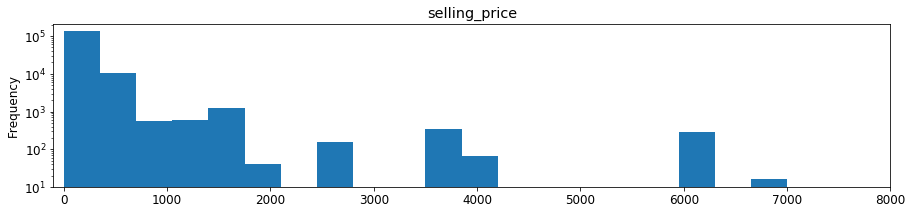



 avg_discount
cluster_1


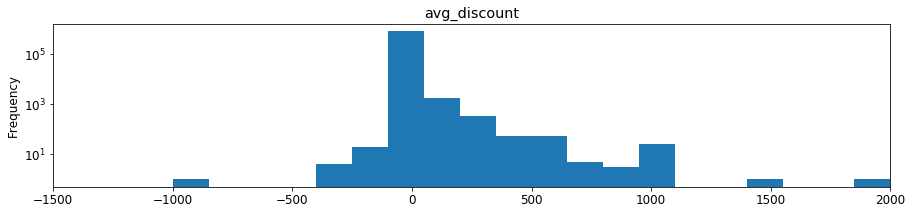

cluster_4


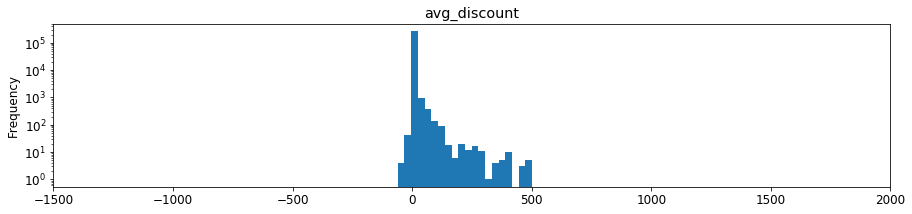

cluster_2


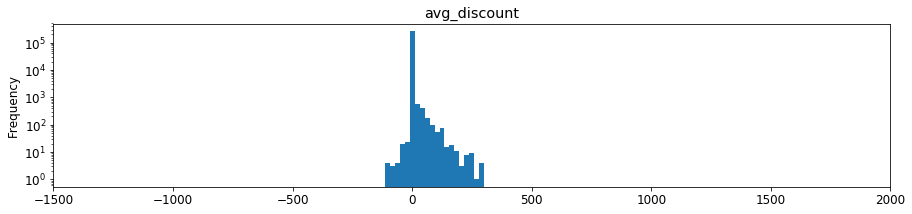

cluster_3


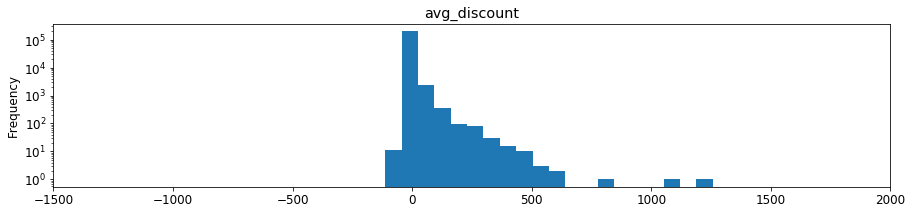

cluster_0


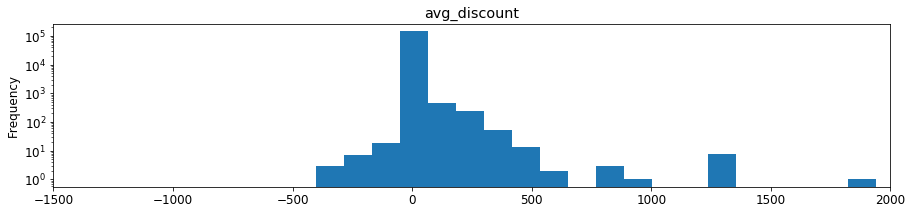

In [51]:
for j in ['sales', 'selling_price', 'avg_discount']:
    print('\n\n', j)
    for i in cluster_dfs.keys():
        print(i)
        plt.figure(figsize=(15,3))
        cluster_dfs[i][j].plot(kind='hist', bins=20, logy=True)
        plt.title(j)
        if j == 'sales':
            plt.xlim(-50, 800)
        elif j == 'selling_price':
            plt.xlim(-100, 8000)
        elif j == 'avg_discount':
            plt.xlim(-1500, 2000)
        
        plt.show()

## Dynamic Time Warping

In [52]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [53]:
product_sales.head()

,sku_key,tran_date,sales,selling_price,avg_discount
0,28,2016-03-02,1,89.9,0.0
1,28,2016-03-03,0,89.9,0.0
2,28,2016-03-04,0,89.9,0.0
3,28,2016-03-05,0,89.9,0.0
4,28,2016-03-06,0,89.9,0.0


In [54]:
product_ts = pd.pivot_table(product_sales, values='sales', index='sku_key', columns='tran_date')

In [55]:
product_ts['nas'] = product_ts.apply(lambda x: x.isna()).sum(axis=1)
print('There are {} products with less than 50% entries'.format(len(product_ts[product_ts['nas'] > len(product_ts.columns)/2])))

There are 651 products with less than 50% entries


In [56]:
product_ts = product_ts.sort_values('nas', ascending=True).drop('nas', axis=1)

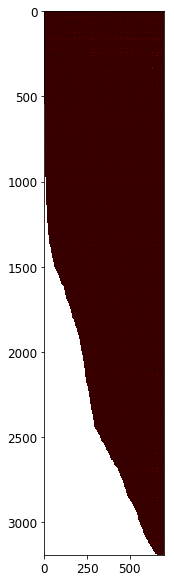

In [57]:
plt.figure(figsize=(5,10))
plt.imshow(product_ts, cmap='hot', interpolation='nearest')
plt.show()

This immediately strikes me as a problem. If we have datasets which only has values for < 50% of the dates (651 products)

For the time being I will fill then with 0's, seeing that they had 'no' sales.

In [58]:
product_ts_fill = product_ts.fillna(0)

In [59]:
product_matrix_fill = product_ts_fill.as_matrix()
product_matrix = product_ts.as_matrix()

In [60]:
product_dict = {}
product_list = []

for i, j in zip(range(len(product_matrix)), product_ts.index):
    product_dict[j] = product_matrix[i][~np.isnan(product_matrix[i])]
    product_list.append(product_matrix[i][~np.isnan(product_matrix[i])])

Now you have a matrix which which had nan's filled with 0, and a list as well as dictionary which has the nan's removed. I.e., the series only contain true entries. First model using the filled matrix, then using the truncated one. 

In [64]:
subsample = 500
product_matrix = product_matrix[:500]

In [ ]:
ds = dtw.distance_matrix_fast(product_matrix_fill)

Computing distances
Compute distances in pure C
Use parallel computation


In [ ]:
ds

In [67]:
from dtaidistance import clustering

In [70]:
model = clustering.LinkageTree(dtw.distance_matrix_fast, {})

In [71]:
model.fit(product_matrix)

Computing distances
Compute distances in pure C
Use parallel computation


ValueError: The condensed distance matrix must contain only finite values.

In [ ]:
model.plot("myplot.png")